<a href="https://colab.research.google.com/github/asmi04513/svm_TF-IDF_Akhwan-Nur-Asmi_60900123013/blob/main/svm_TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install library tambahan
!pip install sastrawi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory


In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0], encoding='latin1')
df.head()

Saving data.csv to data (7).csv


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [ ]:
df.columns


Index(['Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
       'HS_Moderate', 'HS_Strong'],
      dtype='object')

In [ ]:
df = df[['Tweet', 'HS']]
df = df.rename(columns={'Tweet': 'text', 'HS': 'label'})
df.head()

,text,label
0,- disaat semua cowok berusaha melacak perhatia...,1
1,RT USER: USER siapa yang telat ngasih tau elu?...,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1


In [ ]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['text'] = df['text'].apply(clean_text)
df.head()


,text,label
0,disaat semua cowok berusaha melacak perhatian ...,1
1,rt user user siapa yang telat ngasih tau elued...,0
2,kadang aku berfikir kenapa aku tetap percaya p...,0
3,user user aku itu akunnku tau matamu sipit tap...,0
4,user user kaum cebong kapir udah keliatan dong...,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
#split data
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42
)




In [ ]:
#tf-idf
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
#svm
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)


SVC(kernel='linear')

In [ ]:
y_pred = svm.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8451025056947609
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1516
           1       0.84      0.78      0.81      1118

    accuracy                           0.85      2634
   macro avg       0.84      0.84      0.84      2634
weighted avg       0.85      0.85      0.84      2634



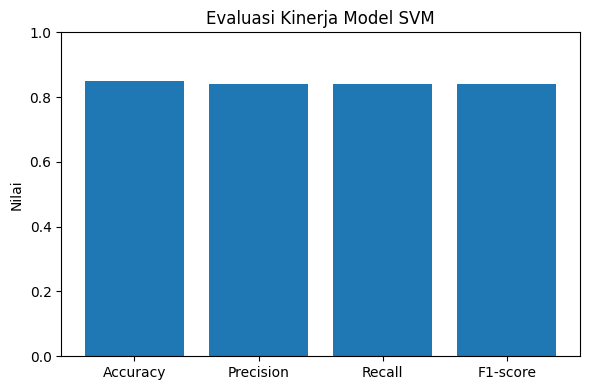

In [ ]:
import matplotlib.pyplot as plt

metrics = {
    'Accuracy': 0.85,
    'Precision': 0.84,
    'Recall': 0.84,
    'F1-score': 0.84
}

plt.figure(figsize=(6,4))
plt.bar(metrics.keys(), metrics.values())
plt.ylim(0,1)
plt.ylabel('Nilai')
plt.title('Evaluasi Kinerja Model SVM')
plt.tight_layout()
plt.show()